Ok, let's set

- Cloud = 0
- Clear = 1

In [6]:
import numpy as np
import pylab as plt
import astroML.stats

plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['font.size'] = 12

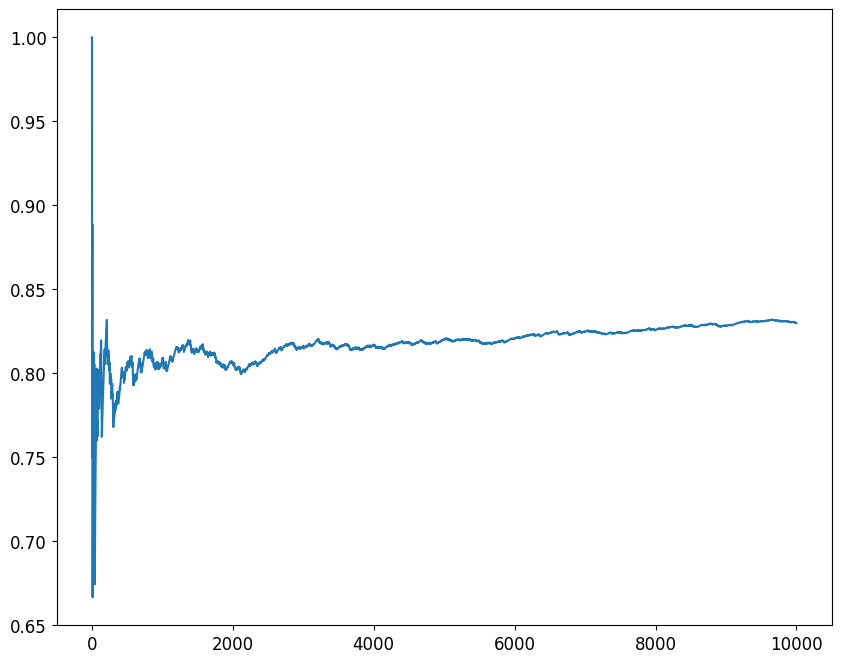

In [7]:
weather = [1] # Weather of the first day

for ii in range(1,10000):
    # implementing forecasts based on probabilities
    if weather[ii-1] == 1:
        weather.append(np.random.choice(np.array([0, 1]), p=np.array([0.1, 0.9])))
    elif weather[ii-1] == 0:
        weather.append(np.random.choice(np.array([0, 1]), p=np.array([0.5, 0.5])))
    else:
        raise ValueError
        
weather = np.array(weather)

running_clear = np.cumsum(weather)/( np.arange(weather.shape[0])+1 )
# plot the running average
plt.plot(running_clear)

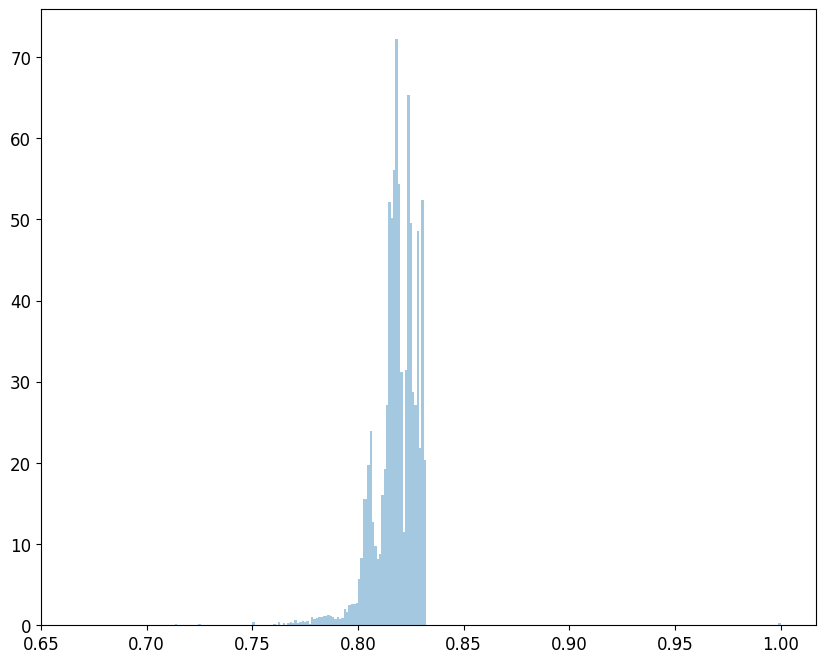

In [8]:
plt.hist(running_clear, bins=300, density=True, alpha=0.4);

In [9]:
print(np.median(running_clear))
print(astroML.stats.sigmaG(running_clear))
print(min(running_clear),max(running_clear))

0.8186769856347188
0.007758512408806221
0.6666666666666666 1.0


Conservative burn-in: ~2000 samples

0.8207948049080799
0.0067484821611623665
0.7995271867612294 0.832107716209218


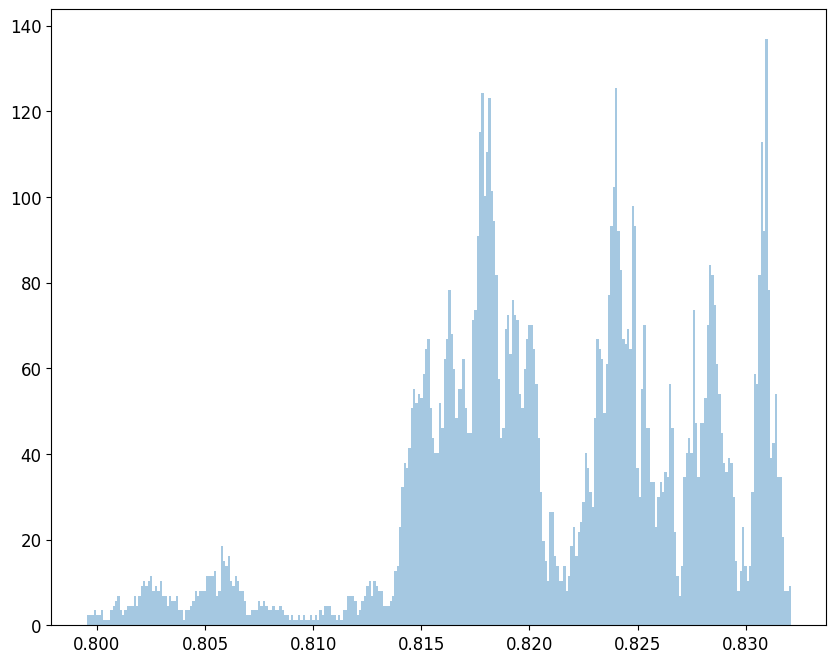

In [10]:
burnin_index=2000
running_burn = running_clear[burnin_index:]


plt.hist(running_burn, bins=300, density=True, alpha=0.4);
print(np.median(running_burn))
print(astroML.stats.sigmaG(running_burn))
print(min(running_burn),max(running_burn))

Much better, those long tails are gone!